# Object Recognition in Images (Supervised Learning: Classification)

## Objective
The objective of this project is to create an objection recoginition classification algorithm using Convulutional Neural Networks (CNN). 
The CNN Will be trained using a sample train dataset and subsquently tested on real images to evaluate performance.

Through creating the trained CNN, the team aims to obtain a better understanding of CNNs and the various steps required for creating a machine learning project, including the following steps:

1. Data Preperation
2. Data Processing
3. Model Training
4. Model Evaluation and testing.



## Imports

To implement this machine learning model, the following libraries were used:

```
pandas
numpy
matplotlib
tensorflow
seaborn
scikit-learn
```



In [1]:
""" import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
 """

' import os\nos.environ["CUDA_VISIBLE_DEVICES"] = ""\n '

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Activation, BatchNormalization
from keras.optimizers import SGD
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score


## getting rid of useless warning messages
import warnings
warnings.filterwarnings('ignore')


2024-04-05 13:14:47.785559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Limit GPU Mem usage

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for gpu in gpu_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

2024-04-05 13:14:49.172658: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-05 13:14:49.195956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-05 13:14:49.196172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## 1. Data Preparation & Class Creation

The first step in the machine learning process is to load the data.


### Dataset
The dataset being used is the CIFAR-10.

This dataset is an established computer-vision dataset used for object recognition. 
It contains a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class.
It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The labelled classes within the data include:

- airplane 
- automobile 
- bird 
- cat 
- deer 
- dog 
- frog 
- horse 
- ship 
- truck

The image type being used in the data are `png` images.


Kaggle is hosting a CIFAR-10 leaderboard for the machine learning community to use for fun and practice

- source: https://www.kaggle.com/competitions/cifar-10


### Loading Data

The keras python library (included with tensorflow) contains a copy of the CIFAR-10. 
This is leveraged to load the data directly through the keras library.

Once loaded it is mapped into two datasets, with the values and labesl seperated.


In [4]:
# Set random seed for reproducable results similar to setting a specific random state
# Does not affect metrics
seed=6
np.random.seed(seed)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training images: {}'.format(X_train.shape))
print('Testing images: {}'.format(X_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [5]:
## data information and directories
# train_labels_df = pd.read_csv('trainLabels.csv') 
# train_labels_df['id'] = train_labels_df['id'].astype(str) + '.png' 
# train_labels_df.head()

### Creating Classes

A list containing the possible output classes is created.

These are then mapped into a dictionary for use as labels within the training.

In [6]:
## In this dataset we will be only looking specifically at the classes below 
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

no_classes=range(0,10)

# dictionary for class lookup
class_labels=dict(zip(no_classes,classes))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


## 2. Preprocessing the dataset

With the dataset loaded, pre-processing is then run to normalize inputs and remove errors.

In this step the training and testing image pixel values are normalized from the 0 to 255 RGB range used in image encoding to a value from 0 to 1.

A sample of this process for the pixel (0,0) of an image can be seen below

image[0,0] = {0,0,255} = {0, 0, 1}



In [7]:
# #again load the dataset as we set the random seed and not apllying any shuffling effects or random effects
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255(RGB) to 0.0-1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0

The values can then be put through one-hot encoding, creating vectors in which the the category is distinguished from the ramining values

In [8]:
# hot encode outputs
Y_train=tf.keras.utils.to_categorical(y_train)
Y_test=tf.keras.utils.to_categorical(y_test)
num_classes=Y_test.shape[1]

print("Number of Classes: " + str(num_classes))

Number of Classes: 10


## 3. Create Model

### Generation of CNN

The function below defines a Convolutional Neural Network (CNN) model designed for image classification, with the All-CNN network used as a reference. 

This function uses a saved pretrained weights file to generate model: allowing the security of epochs from a previous state in the runtime.

In [9]:
def allcnn(weights=None):

    # set model as sequential, allow for stacking oflayers
    model = Sequential()

    # add convulutional layers 32x32x3
    model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
    model.add(BatchNormalization())

    # add convulutional layers 32x32x3
    model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
    model.add(BatchNormalization())

    # create a pool 2,2 pool size, reduces input volume, dropout to prevent overfit
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))    

    # add convulutional layers 32x32x3
    model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
    model.add(BatchNormalization())

    # add convulutional layers 32x32x3
    model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
    model.add(BatchNormalization())

    # create a pool 2,2 pool size, reduces input volume, dropout to prevent overfit
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # add convulutional layers 32x32x3
    model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
    model.add(BatchNormalization())

    # add convulutional layers 32x32x3
    model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
    model.add(BatchNormalization())

    # create a pool 2,2 pool size, reduces input volume, dropout to prevent overfit
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.35))

    # flatten layers down to 10
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    #load the weights,if passed
    if weights:
        model.load_weights(weights)
    
    #return model
    return model

model = allcnn()

2024-04-05 13:14:49.687955: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 13:14:49.688834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-05 13:14:49.689047: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-05 13:14:49.689215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there m

## 4. Train Model

Use the generated model function to train.

Initially set the learning rate and compile a base mode. Train the model using the training dataset over 20 epochs. Learn from previous model to generate gradually increasing accuracy in learning.

In each step of the model, validate the accuracy against the test dataset. Compare the accuracy of the canidate model against a stored 'best model'. 
If the model is evaluated as being better, save the canidate model.

Once all epochs have been completed, load the best model to use for the classification and validation.

In [10]:
# Define learning rate schedule and optimizer 
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay( ## the purpose of this is to modify the learning rate during training to prevent oscilation
    initial_learning_rate,
    decay_steps=100000, 
    decay_rate=0.96, 
    staircase=True
)

sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True) ## SGD 

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Print the model summary
# print(model.summary())

# Model training
best_val_accuracy = 0.0
for epoch in range(20): 
    print("Running epoch ",epoch,"...")
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1, batch_size=32, verbose=1)
    val_accuracy = history.history['val_accuracy'][0]
    
    # eval model performance
    if val_accuracy > best_val_accuracy:

        best_val_accuracy = val_accuracy

        # save best model
        model.save('best_model.keras' )

# Loading the entire model
final_model = tf.keras.models.load_model('best_model.keras')
final_model.save('final_best_model.keras') 

### Generation of CNN with L2 

The function below defines a Convolutional Neural Network (CNN) model designed for image classification, with the All-CNN network used as a reference. 

This function uses a saved pretrained weights file to generate model: allowing the security of epochs from a previous state in the runtime.

To test out penalty functionality L2 regularization was implemented at 0.001

In [11]:
def allcnn_L2(weights=None):
    
    # set model as sequential, allow for stacking oflayers
    model = Sequential()

    # add convulutional layers 32x32x3
    model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same', kernel_regularizer=regularizers.l2(0.001))) ## adding l2 at the end of each Conv2D 
    model.add(BatchNormalization())

    # add convulutional layers 32x32x3
    model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())

    # create a pool 2,2 pool size, reduces input volume, dropout to prevent overfit
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))    

    # add convulutional layers 32x32x3
    model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())

    # add convulutional layers 32x32x3
    model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())

    # create a pool 2,2 pool size, reduces input volume, dropout to prevent overfit
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # add convulutional layers 32x32x3
    model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())

    # add convulutional layers 32x32x3
    model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same', kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())

    # create a pool 2,2 pool size, reduces input volume, dropout to prevent overfit
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.35))

    # flatten layers down to 10
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    #return model
    return model

model2 = allcnn_L2()

In [12]:
# Define learning rate schedule and optimizer 
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay( ## the purpose of this is to modify the learning rate during training to prevent oscilation
    initial_learning_rate,
    decay_steps=100000, 
    decay_rate=0.96, 
    staircase=True
)

sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True) ## SGD 

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Model training
best_val_accuracy = 0.0
for epoch in range(20): 
    print("Running epoch ",epoch,"...")
    history = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1, batch_size=32, verbose=1)
    val_accuracy = history.history['val_accuracy'][0]
    
    # eval model performance
    if val_accuracy > best_val_accuracy:

        best_val_accuracy = val_accuracy

        # save best model
        model2.save('best_model_l2.keras')

# Loading the entire model
final_model2 = tf.keras.models.load_model('best_model_l2.keras')
final_model2.save('final_best_model_l2.keras') 

Running epoch  0 ...


2024-04-05 13:14:51.698217: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-05 13:14:51.799708: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8902
2024-04-05 13:14:51.952623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1563/1563 [==============================] - 12s 7ms/step - loss: 2.4094 - accuracy: 0.3837 - val_loss: 1.8389 - val_accuracy: 0.5206
Running epoch  1 ...
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6209 - accuracy: 0.5768 - val_loss: 1.7756 - val_accuracy: 0.5122
Running epoch  2 ...
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2673 - accuracy: 0.6747 - val_loss: 1.2037 - val_accuracy: 0.6964
Running epoch  3 ...
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1045 - accuracy: 0.7277 - val_loss: 1.0976 - val_accuracy: 0.7327
Running epoch  4 ...
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0294 - accuracy: 0.7564 - val_loss: 1.1239 - val_accuracy: 0.7283
Running epoch  5 ...
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9828 - accuracy: 0.7786 - val_loss: 1.0361 - val_accuracy: 0.7626
Running epoch  6 ...
1563/1563 [==============================] - 10s 7ms/step - loss: 0.96

### Hyperparameter Tuning 

Once the best model has been obtained, apply hyperparameter tuning to further increase accuracy.

In [13]:
# Define hyperparameters
learning_rate = 0.001
momentum = 0.9

# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=100000, 
    decay_rate=0.96, 
    staircase=True)

model_path = 'final_best_model.keras'  # updated path for the optimal model

try:
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except IOError:
    print("No pretrained model found at {}. Initializing a new model.".format(model_path))


# define the optimizer with the updated learning rate schedule and compile the model
sgd = SGD(learning_rate=lr_schedule, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print final model summary
print(model.summary())


Model loaded successfully.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                             

### Model with L2 comparison

In [14]:
# Define hyperparameters
learning_rate = 0.001
momentum = 0.9

# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=100000, 
    decay_rate=0.96, 
    staircase=True)

model2_path = 'final_best_model_l2.keras'  # updated path for the optimal model

try:
    model2 = tf.keras.models.load_model(model2_path)
    print("Model loaded successfully.")
except IOError:
    print("No pretrained model found at {}. Initializing a new model.".format(model2_path))


# define the optimizer with the updated learning rate schedule and compile the model
sgd = SGD(learning_rate=lr_schedule, momentum=momentum, nesterov=True)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print final model summary
print(model2.summary())

Model loaded successfully.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                           

## 5. Model Evaluation and Testing

Once model has been selected and tuned using hyperparameter tuning, evaluate the performance accuracy of the model.

In [15]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1] * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4973 - accuracy: 0.8536
Accuracy: 85.36%


Predictions using the input model can also be created. Predictions attempt to classify the test input images using the trained model.

For each class, the precision, recall and f1 score.

- Precision measures the number of true postive against the total predictions for the class 

$$
precision = {TruePositives \over {TruePositives + FalsePositives}}
$$

- Recall measures the number of true positives for the class against the total images for the class

$$
Recall = {TruePositives \over {TruePositives + FalseNegatives}}
$$

- f1 score is acombination of the precision and recall using the formula

$$
f1-score = {2 \times {Precision \times Recall } \over {Precision + Recall}}
$$



In [16]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.94      0.94      0.94      1000
           2       0.77      0.81      0.79      1000
           3       0.73      0.68      0.71      1000
           4       0.79      0.86      0.83      1000
           5       0.80      0.77      0.78      1000
           6       0.89      0.90      0.89      1000
           7       0.93      0.86      0.89      1000
           8       0.93      0.92      0.93      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy: 0.8536


### L2 Model Metrics for Comparison 

In [17]:
# Evaluate the model
scores2 = model2.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores2[1] * 100))

313/313 [==============================] - 1s 2ms/step - loss: 1.0377 - accuracy: 0.8164
Accuracy: 85.36%


In [18]:
predictions2 = model2.predict(X_test)
predictions2 = np.argmax(predictions2, axis=1)  # Convert probabilities to class labels

print(classification_report(y_test, predictions2))
print("Accuracy:", accuracy_score(y_test, predictions2))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1000
           1       0.93      0.90      0.91      1000
           2       0.83      0.66      0.73      1000
           3       0.71      0.61      0.66      1000
           4       0.80      0.81      0.80      1000
           5       0.67      0.84      0.75      1000
           6       0.83      0.89      0.86      1000
           7       0.82      0.89      0.85      1000
           8       0.92      0.85      0.88      1000
           9       0.94      0.84      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Accuracy: 0.8164


## 6. Visualization

Data can be visualized using a confusion matrix. 

This shows the classisification, both correct and incorrect for the different classes which were predicted by the model.



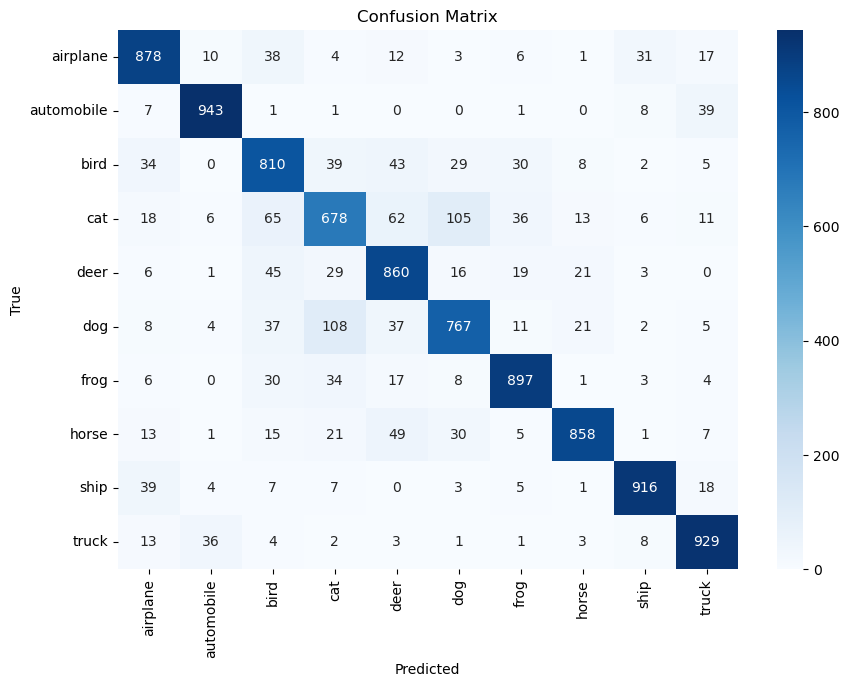

In [19]:
# Assuming 'predictions_labels' and 'y_test' are your predicted and true labels respectively
cm = confusion_matrix(y_test, predictions)
cm_rounded = np.round(cm)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Sample Image Visualization

Use sample batch of data from the test data set to classify and visualize

In [20]:
class_labels=dict(zip(no_classes,classes))

# generate batch of 15 images to predict
batch=X_test[100:115]
labels=np.argmax(Y_test[100:115],axis=-1)

#make predictions
predictions=model.predict(batch,verbose=1)

# use np.argmax() to convert class probabilities to class labels
class_result=np.argmax(predictions,axis=-1)


1/1 [==============================] - 0s 48ms/step


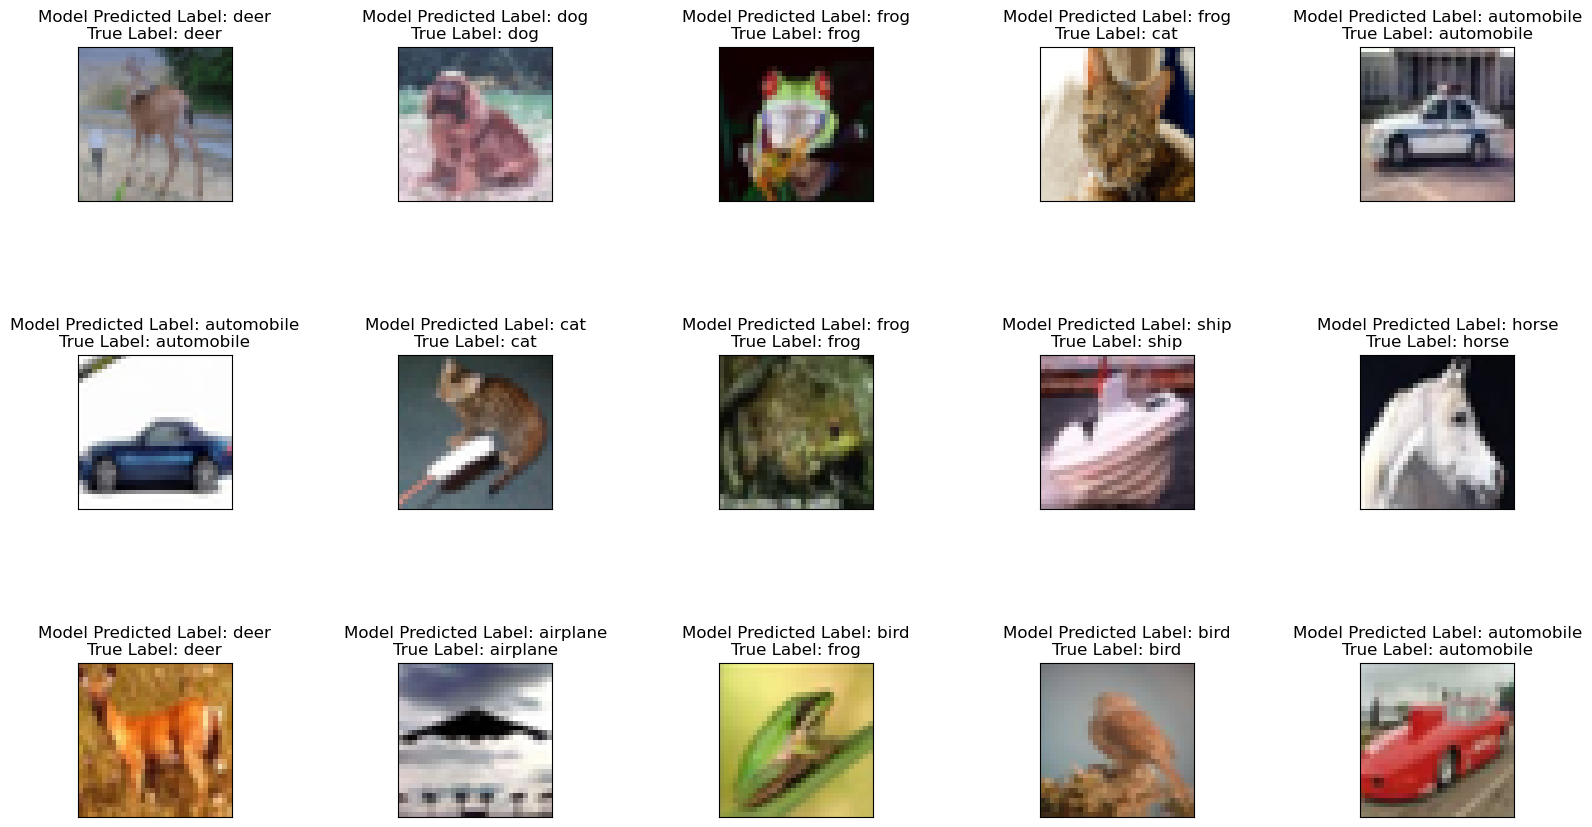

In [21]:
# create a grid of 3x3 images
fig,axs=plt.subplots(3,5,figsize=(20,10))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate (batch):
        # determine label for each prediction, set title
        for key,value in class_labels.items():
            if class_result[i]==key:
                title = 'Model Predicted Label: {}\nTrue Label: {}'.format(class_labels[key], class_labels[labels[i]])
                axs[i].set_title(title)
                axs[i].axes.get_xaxis().set_visible(False)
                axs[i].axes.get_yaxis().set_visible(False)
            
        # plot the image
        axs[i].imshow(img)
    
# show the plot
plt.show()     

### L2 Regularization Evaluation

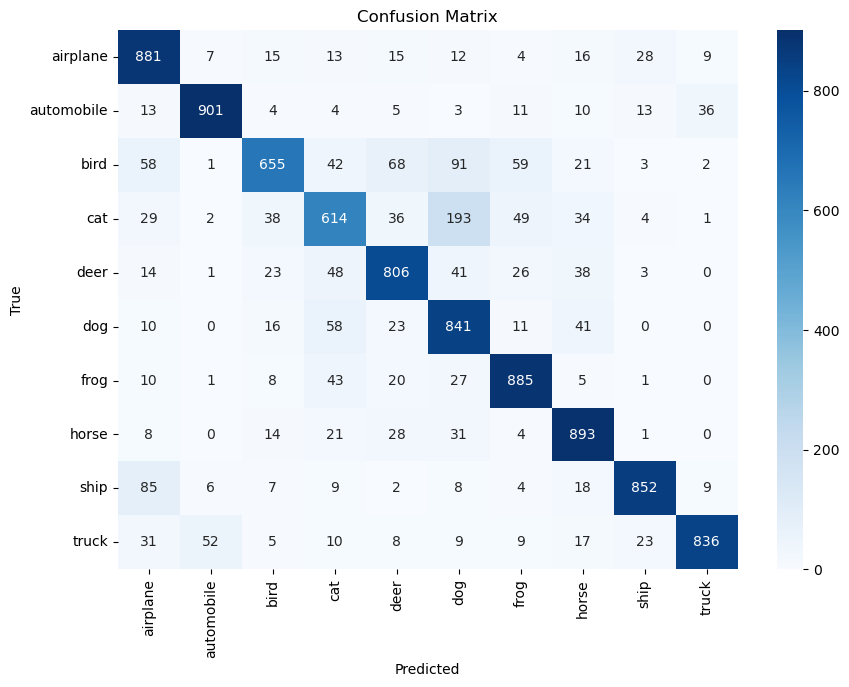

In [22]:
# Assuming 'predictions_labels' and 'y_test' are your predicted and true labels respectively
cm2 = confusion_matrix(y_test, predictions2)
cm_rounded2 = np.round(cm2)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
class_labels2=dict(zip(no_classes,classes))

# generate batch of 15 images to predict
batch=X_test[100:115]
labels=np.argmax(Y_test[100:115],axis=-1)

#make predictions
predictions2=model2.predict(batch,verbose=1)

# use np.argmax() to convert class probabilities to class labels
class_result2=np.argmax(predictions2,axis=-1)

1/1 [==============================] - 0s 15ms/step


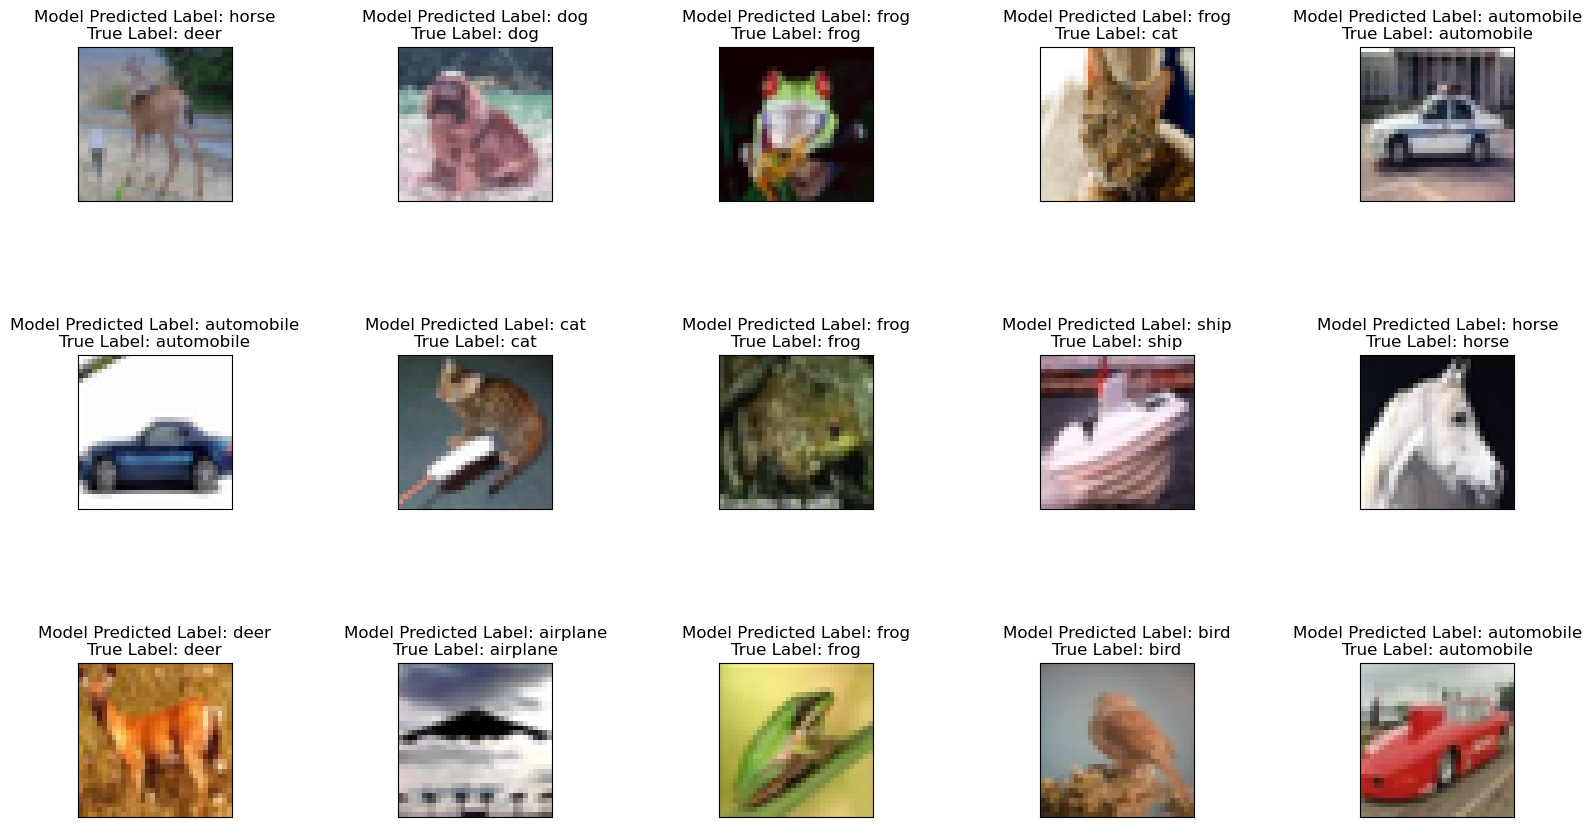

In [24]:
# create a grid of 3x3 images
fig,axs=plt.subplots(3,5,figsize=(20,10))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate (batch):
        # determine label for each prediction, set title
        for key,value in class_labels2.items():
            if class_result2[i]==key:
                title = 'Model Predicted Label: {}\nTrue Label: {}'.format(class_labels2[key], class_labels2[labels[i]])
                axs[i].set_title(title)
                axs[i].axes.get_xaxis().set_visible(False)
                axs[i].axes.get_yaxis().set_visible(False)
            
        # plot the image
        axs[i].imshow(img)
    
# show the plot
plt.show() 